In [247]:
# Project: Do changes in fuel prices affect political support?

# Edward Natusch - Data Science Project - University of Bristol 

# In this notebook, I will scrape presidential polling data (collected daily) for Biden, Trump and Obama from Rasmussen Reports using pandas.

# I will then clean this data.

# I will then download retail gasoline prices (collected weekly) from the FRED API.

# I will the merge the data sets, creating three CSV files with polling data and retail gasoline prices for each presidency.

# I have decided to lag the Presidential polling data by a month to allow some time for political support to react to price changes.

# I will then plot a linear regression line for presidential approval (1 month lag) and the retail price of gasoline for each president using seaborn.

# I will also calculate the equation of the regression line, the correlation coefficient and the R^2 for each president.

# The retail price of gasoline (all grades all formulations) is collected every monday at 8am by the US Energy Information Administration.
# More information on their methodology can be found here: https://www.eia.gov/petroleum/gasdiesel/gas_proc-methods.php.

# The Polling Data for Rasmussen Reports Presidential Polls is collected via auomated landline telephone calls during the hours of 9am to 5pm during the week.
# More information on their methodology can be found here: https://www.rasmussenreports.com/public_content/about_us/methodology.


In [248]:
# Scraping the polling data from Rasmussen Reports using Pandas.

import pandas as pd

Trump_Approval = pd.read_html('https://www.rasmussenreports.com/public_content/politics/Trump_administration/Trump_approval_index_history')

# Loading and cleaning the data 

DF_Trump_Approval = Trump_Approval[0]

DF_Trump_Approval["Date"] = pd.to_datetime(DF_Trump_Approval["Date"])

DF_Trump_Approval['Total Approve'] = DF_Trump_Approval['Total Approve'].str.replace('%',' ')
DF_Trump_Approval['Total Approve'] = pd.to_numeric(DF_Trump_Approval['Total Approve'], errors ='coerce')
DF_Trump_Approval.dropna(subset = ["Total Approve"], inplace=True)

DF_Trump_Approval['Total Disapprove'] = DF_Trump_Approval['Total Disapprove'].str.replace('%',' ')
DF_Trump_Approval['Total Disapprove'] = pd.to_numeric(DF_Trump_Approval['Total Disapprove'], errors ='coerce')
DF_Trump_Approval.dropna(subset = ["Total Disapprove"], inplace=True)

DF_Trump_Approval['Strongly Approve'] = DF_Trump_Approval['Strongly Approve'].str.replace('%',' ')
DF_Trump_Approval['Strongly Approve'] = pd.to_numeric(DF_Trump_Approval['Strongly Approve'], errors ='coerce')
DF_Trump_Approval.dropna(subset = ["Strongly Approve"], inplace=True)


DF_Trump_Approval['Strongly Disapprove'] = DF_Trump_Approval['Strongly Disapprove'].str.replace('%',' ')
DF_Trump_Approval['Strongly Disapprove'] = pd.to_numeric(DF_Trump_Approval['Strongly Disapprove'], errors ='coerce')
DF_Trump_Approval.dropna(subset = ["Strongly Disapprove"], inplace=True)

# Lagging the polling data by a month

DF_Trump_Approval['Date'] = pd.DatetimeIndex(DF_Trump_Approval['Date']) + pd.DateOffset(months=-1)

In [249]:
# Importing the required packages to download the data from the FRED API.

import requests

import os 

import json

from google.colab import files

In [262]:
# Downloading the Json file from th Fred API and loading it into a pandas data frame 

url = 'https://api.stlouisfed.org/fred/series/observations?series_id=GASALLW&api_key=e725511ce5615fe46441618aca9c09bf&file_type=json'

data = requests.get(url)

Retail_Gasoline_Consumer_Price = data.json()

Observations = Retail_Gasoline_Consumer_Price['observations']

Retail_Gasoline_Consumer_Price_Array=[]

for x in Observations:
  temp_variable={'date':x['date'],'value':x['value']}
  Retail_Gasoline_Consumer_Price_Array.append(temp_variable)

DF_Retail_Gasoline_Price  = pd.DataFrame(Retail_Gasoline_Consumer_Price_Array)

# Adding New Column Names 

DF_Retail_Gasoline_Price.columns = ['Date','Retail Price of Gasoline (Dollars per Gallon)']

# Formatting Dates

DF_Retail_Gasoline_Price['Date'] = pd.to_datetime(DF_Retail_Gasoline_Price['Date'])

# Formatting Price Index

DF_Retail_Gasoline_Price['Retail Price of Gasoline (Dollars per Gallon)'] = pd.to_numeric(DF_Retail_Gasoline_Price['Retail Price of Gasoline (Dollars per Gallon)'], errors ='coerce')


In [251]:
# Merging the data from the two data sources to create a single data set 

DF_Trump_Approval_Weekly_With_Gasoline_Prices = DF_Trump_Approval.merge(DF_Retail_Gasoline_Price, left_on='Date', right_on='Date')

# Creating a new year field

DF_Trump_Approval_Weekly_With_Gasoline_Prices['Year'] = pd.DatetimeIndex(DF_Trump_Approval_Weekly_With_Gasoline_Prices['Date']).year

# Exporting the data to csv

DF_Trump_Approval_Weekly_With_Gasoline_Prices.to_csv("Project_President_Trump_Polling_Weekly_Retail_Price_of_Gasoline.csv")

In [252]:
# Creating the same data set for Barack Obama

import pandas as pd

Obama_Approval = pd.read_html('https://www.rasmussenreports.com/public_content/politics/obama_administration/obama_approval_index_history')

# Loading and cleaning the data 

DF_Obama_Approval = Obama_Approval[0]

DF_Obama_Approval["Date"] = pd.to_datetime(DF_Obama_Approval["Date"])

DF_Obama_Approval['Total Approve'] = DF_Obama_Approval['Total Approve'].str.replace('%',' ')
DF_Obama_Approval['Total Approve'] = pd.to_numeric(DF_Obama_Approval['Total Approve'], errors ='coerce')
DF_Obama_Approval.dropna(subset = ["Total Approve"], inplace=True)

DF_Obama_Approval['Total Disapprove'] = DF_Obama_Approval['Total Disapprove'].str.replace('%',' ')
DF_Obama_Approval['Total Disapprove'] = pd.to_numeric(DF_Obama_Approval['Total Disapprove'], errors ='coerce')
DF_Obama_Approval.dropna(subset = ["Total Disapprove"], inplace=True)

DF_Obama_Approval['Strongly Approve'] = DF_Obama_Approval['Strongly Approve'].str.replace('%',' ')
DF_Obama_Approval['Strongly Approve'] = pd.to_numeric(DF_Obama_Approval['Strongly Approve'], errors ='coerce')
DF_Obama_Approval.dropna(subset = ["Strongly Approve"], inplace=True)


DF_Obama_Approval['Strongly Disapprove'] = DF_Obama_Approval['Strongly Disapprove'].str.replace('%',' ')
DF_Obama_Approval['Strongly Disapprove'] = pd.to_numeric(DF_Obama_Approval['Strongly Disapprove'], errors ='coerce')
DF_Obama_Approval.dropna(subset = ["Strongly Disapprove"], inplace=True)

# Lagging the polling data by a month

DF_Obama_Approval['Date'] = pd.DatetimeIndex(DF_Obama_Approval['Date']) + pd.DateOffset(months=-1)

In [253]:
# Merging the data from the two data sources to create a single data set 

DF_Obama_Approval_Weekly_With_Gasoline_Prices = DF_Obama_Approval.merge(DF_Retail_Gasoline_Price, left_on='Date', right_on='Date')

# Creating a new year field

DF_Obama_Approval_Weekly_With_Gasoline_Prices['Year'] = pd.DatetimeIndex(DF_Obama_Approval_Weekly_With_Gasoline_Prices['Date']).year

# Exporting the data to csv

DF_Obama_Approval_Weekly_With_Gasoline_Prices.to_csv("Project_President_Obama_Polling_Weekly_Retail_Price_of_Gasoline.csv")

In [254]:
# Creating the same data set for President biden

Biden_Approval = pd.read_html('https://www.rasmussenreports.com/public_content/politics/Biden_administration/Biden_approval_index_history')

# Loading and cleaning the data 

DF_Biden_Approval = Biden_Approval[0]

DF_Biden_Approval["Date"] = pd.to_datetime(DF_Biden_Approval["Date"])

DF_Biden_Approval['Total Approve'] = DF_Biden_Approval['Total Approve'].str.replace('%',' ')
DF_Biden_Approval['Total Approve'] = pd.to_numeric(DF_Biden_Approval['Total Approve'], errors ='coerce')
DF_Biden_Approval.dropna(subset = ["Total Approve"], inplace=True)

DF_Biden_Approval['Total Disapprove'] = DF_Biden_Approval['Total Disapprove'].str.replace('%',' ')
DF_Biden_Approval['Total Disapprove'] = pd.to_numeric(DF_Biden_Approval['Total Disapprove'], errors ='coerce')
DF_Biden_Approval.dropna(subset = ["Total Disapprove"], inplace=True)

DF_Biden_Approval['Strongly Approve'] = DF_Biden_Approval['Strongly Approve'].str.replace('%',' ')
DF_Biden_Approval['Strongly Approve'] = pd.to_numeric(DF_Biden_Approval['Strongly Approve'], errors ='coerce')
DF_Biden_Approval.dropna(subset = ["Strongly Approve"], inplace=True)


DF_Biden_Approval['Strongly Disapprove'] = DF_Biden_Approval['Strongly Disapprove'].str.replace('%',' ')
DF_Biden_Approval['Strongly Disapprove'] = pd.to_numeric(DF_Biden_Approval['Strongly Disapprove'], errors ='coerce')
DF_Biden_Approval.dropna(subset = ["Strongly Disapprove"], inplace=True)

# Lagging the polling data by a month

DF_Biden_Approval['Date'] = pd.DatetimeIndex(DF_Biden_Approval['Date']) + pd.DateOffset(months=-1)

In [255]:
# Merging the data from the two data sources to create a single data set 

DF_Biden_Approval_Weekly_With_Gasoline_Prices = DF_Biden_Approval.merge(DF_Retail_Gasoline_Price, left_on='Date', right_on='Date')

# Creating a month field

DF_Biden_Approval_Weekly_With_Gasoline_Prices['Month'] = pd.DatetimeIndex(DF_Biden_Approval_Weekly_With_Gasoline_Prices['Date']).month

# Exporting the data to csv

DF_Biden_Approval_Weekly_With_Gasoline_Prices.to_csv("Project_President_Biden_Polling_Weekly_Retail_Price_of_Gasoline.csv")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


y =  -8.22  * x +  72.06
R² =  0.52
Correlation Coefficient
 [[ 1.         -0.71785479]
 [-0.71785479  1.        ]]


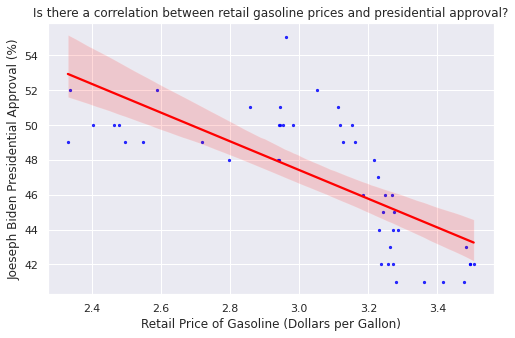

In [256]:
# 1. Joe Biden Regressing Presidential Approval (Weekly Average) on the weekly Retail Price Price of Gasoline 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
figure(figsize=(8,5))
sns.set()
import numpy as np

x = DF_Biden_Approval_Weekly_With_Gasoline_Prices['Retail Price of Gasoline (Dollars per Gallon)']

y = DF_Biden_Approval_Weekly_With_Gasoline_Prices['Total Approve']

ax = sns.regplot(x, y, marker = 'o', scatter_kws={"color": "blue","s": 5}, line_kws={"color": "red"}).set_title('Is there a correlation between retail gasoline prices and presidential approval?')

plt.ylabel( "Joeseph Biden Presidential Approval (%)" , size = 12 )

# Calculating a regression equation and R^2 

from scipy.stats import linregress
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

# Code to print regression equation and R^2 adapted from https://www.dropbox.com/sh/xkw12cmttvs2z93/AACmyjRIyCM0BxLGmFGES6Zpa/week10?dl=0&preview=Week10_06_Seaborn.ipynb&subfolder_nav_tracking=1

print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

# Calculating a correlation coefficient

print('Correlation Coefficient\n', (np.corrcoef(DF_Biden_Approval_Weekly_With_Gasoline_Prices['Retail Price of Gasoline (Dollars per Gallon)'],DF_Biden_Approval_Weekly_With_Gasoline_Prices['Total Approve'])))

# Saving the plot as an image

plt.savefig('Project_Biden_Presidential_Approval_Vs._Retail_Price_Gasoline.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


y =  0.9  * x +  44.81
R² =  0.01
Correlation Coefficient
 [[1.         0.08534004]
 [0.08534004 1.        ]]


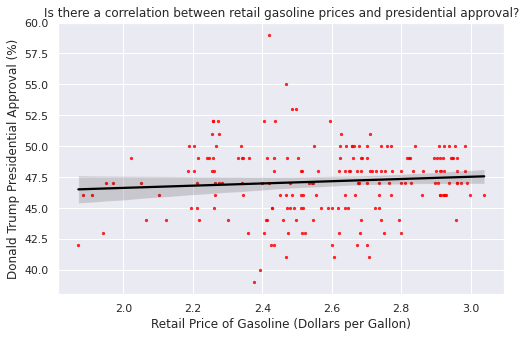

In [260]:
# 2. Donald Trump Regressing Presidential Approval (Weekly Average) on the weekly Retail Price Price of Gasoline 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
figure(figsize=(8,5))
sns.set()
import numpy as np

x = DF_Trump_Approval_Weekly_With_Gasoline_Prices['Retail Price of Gasoline (Dollars per Gallon)']

y = DF_Trump_Approval_Weekly_With_Gasoline_Prices['Total Approve']

ax = sns.regplot(x, y, marker = 'o', scatter_kws={"color": "red","s": 5}, line_kws={"color": "black"}).set_title('Is there a correlation between retail gasoline prices and presidential approval?')

plt.ylabel( "Donald Trump Presidential Approval (%)" , size = 12 )

# Calculating a regression equation and R^2 

from scipy.stats import linregress
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

# Code to print regression equation and R^2 adapted from https://www.dropbox.com/sh/xkw12cmttvs2z93/AACmyjRIyCM0BxLGmFGES6Zpa/week10?dl=0&preview=Week10_06_Seaborn.ipynb&subfolder_nav_tracking=1

print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

# Calculating a correlation coefficient

print('Correlation Coefficient\n', (np.corrcoef(DF_Trump_Approval_Weekly_With_Gasoline_Prices['Retail Price of Gasoline (Dollars per Gallon)'],DF_Trump_Approval_Weekly_With_Gasoline_Prices['Total Approve'])))

# Saving the plot as an image

plt.savefig('Project_Trump_Presidential_Approval_Vs._Retail_Price_Gasoline.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


y =  -2.53  * x +  56.36
R² =  0.15
Correlation Coefficient
 [[ 1.         -0.38580392]
 [-0.38580392  1.        ]]


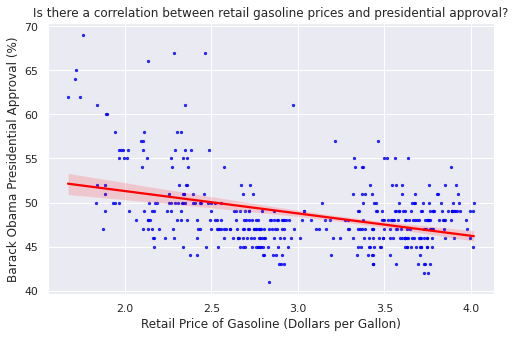

In [261]:
# 3. Barack Obama: Regressing Presidential Approval (Weekly Average) on the weekly Retail Price Price of Gasoline 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
figure(figsize=(8,5))
sns.set()
import numpy as np

x = DF_Obama_Approval_Weekly_With_Gasoline_Prices['Retail Price of Gasoline (Dollars per Gallon)']

y = DF_Obama_Approval_Weekly_With_Gasoline_Prices['Total Approve']

ax = sns.regplot(x, y, marker = 'o', scatter_kws={"color": "blue","s": 5}, line_kws={"color": "red"}).set_title('Is there a correlation between retail gasoline prices and presidential approval?')

plt.ylabel( "Barack Obama Presidential Approval (%)" , size = 12 )

# Calculating a regression equation and R^2 

from scipy.stats import linregress
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

# Code to print regression equation and R^2 adapted from https://www.dropbox.com/sh/xkw12cmttvs2z93/AACmyjRIyCM0BxLGmFGES6Zpa/week10?dl=0&preview=Week10_06_Seaborn.ipynb&subfolder_nav_tracking=1

print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

# Calculating a correlation coefficient

print('Correlation Coefficient\n', (np.corrcoef(DF_Obama_Approval_Weekly_With_Gasoline_Prices['Retail Price of Gasoline (Dollars per Gallon)'],DF_Obama_Approval_Weekly_With_Gasoline_Prices['Total Approve'])))

# Saving the plot as an image

plt.savefig('Project_Obama_Presidential_Approval_Vs._Retail_Price_Gasoline.png')